In [1]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('/content/lt smdw.csv',
               header=None, na_values='?')

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Area,Sensing,Transmission,Number of,Number of Barriers,NaN,NaN,NaN,NaN,NaN
3,NaN,Range,Range,Sensor nodes,Binary Sensing Model,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Uniform Distribution,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

0      4
1      3
2      3
3      3
4      2
5    187
6    187
7    187
8    187
9    187
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
df_im=si.fit_transform(df)
df_im=pd.DataFrame(df_im)

In [8]:
df_im.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [9]:
df_im.shape

(187, 5)

In [35]:
cols=[0,1,2,3,4]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
  df_im[i]=le.fit_transform(df_im[i])
df_im.head()

,0,1,2,3,4
0,0,0,0,0,66
1,0,0,0,0,66
2,7,27,27,26,123
3,0,26,26,27,122
4,0,0,0,0,124


In [36]:
df_im.describe()

,0,1,2,3,4
count,187.000000,187.000000,187.000000,187.000000,187.000000
mean,2.957219,12.449198,12.449198,12.449198,62.304813
std,2.047366,7.724513,7.724513,7.724513,35.676385
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.000000,6.000000,6.000000,30.500000
50%,3.000000,12.000000,12.000000,12.000000,66.000000
75%,5.000000,19.000000,19.000000,19.000000,90.500000
max,7.000000,27.000000,27.000000,27.000000,124.000000


In [16]:
target=df_im[0]

In [17]:
target.shape

(187,)

In [18]:
data=df_im.drop(columns=[0])

In [19]:
data.shape

(187, 4)

In [20]:
data.head()

,1,2,3,4
0,0,0,0,66
1,0,0,0,66
2,27,27,26,123
3,26,26,27,122
4,0,0,0,124


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data, target, test_size=0.25)

In [22]:
x_train.shape

(140, 4)

In [24]:
x_test.shape

(47, 4)

In [37]:
from sklearn.linear_model import Perceptron

In [47]:
p=Perceptron(penalty='l2')

In [48]:
p.fit(x_train,y_train)

Perceptron(penalty='l2')

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
p_train_pred=p.predict(x_train)

In [51]:
p_test_pred=p.predict(x_test)

In [58]:
print("training accuracy: ", accuracy_score(p_train_pred, y_train))

training accuracy:  0.15


In [57]:
print('Testing accuracy: ', accuracy_score(p_test_pred, y_test))

Testing accuracy:  0.10638297872340426


In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr=LogisticRegression()

In [61]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
lr_train_pred=lr.predict(x_train)

In [63]:
lr_test_pred=lr.predict(x_test)

In [65]:
print("Training accuracy: ", accuracy_score(lr_train_pred,y_train))

Training accuracy:  0.17142857142857143


In [66]:
print("Testing accuracy: ", accuracy_score(lr_test_pred, y_test))

Testing accuracy:  0.0425531914893617


In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt_id=DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [69]:
dt_id.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [70]:
dt_train_pred=dt_id.predict(x_train)
dt_test_pred=dt_id.predict(x_test)

In [71]:
print("training accuracy: ",accuracy_score(dt_train_pred,y_train))

training accuracy:  0.8


In [72]:
print("testing accuracy: ", accuracy_score(dt_test_pred, y_test))

testing accuracy:  0.0851063829787234


In [73]:
from sklearn.tree import plot_tree

[Text(0.44632352941176473, 0.9444444444444444, 'x[3] <= 121.5\nentropy = 2.842\nsamples = 140\nvalue = [20, 23, 18, 19, 21, 21, 17, 1]'),
 Text(0.3014705882352941, 0.8333333333333334, 'x[3] <= 10.5\nentropy = 2.8\nsamples = 137\nvalue = [18, 23, 18, 19, 21, 21, 17, 0]'),
 Text(0.047058823529411764, 0.7222222222222222, 'x[0] <= 14.5\nentropy = 2.134\nsamples = 13\nvalue = [0, 3, 0, 2, 1, 5, 2, 0]'),
 Text(0.023529411764705882, 0.6111111111111112, 'x[2] <= 5.5\nentropy = 1.522\nsamples = 5\nvalue = [0, 0, 0, 0, 1, 2, 2, 0]'),
 Text(0.011764705882352941, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2, 0, 0]'),
 Text(0.03529411764705882, 0.5, 'x[1] <= 11.0\nentropy = 0.918\nsamples = 3\nvalue = [0, 0, 0, 0, 1, 0, 2, 0]'),
 Text(0.023529411764705882, 0.3888888888888889, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0, 0]'),
 Text(0.047058823529411764, 0.3888888888888889, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 2, 0]'),
 Text(0.07058823529411765, 0.6111

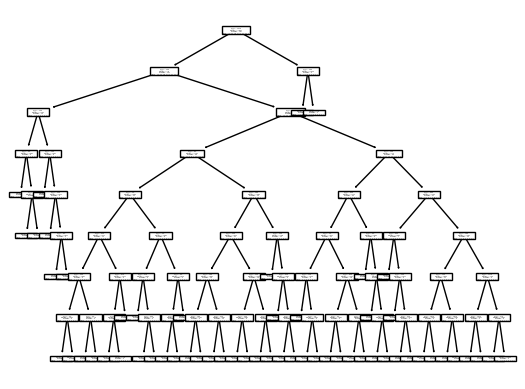

In [74]:
plot_tree(dt_id)